In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train-chennai-sale.csv")

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.shape

(7109, 22)

In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# DATA CLEANING

In [8]:
df[df.duplicated()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [9]:
df = df.drop(["PRT_ID","QS_ROOMS","QS_OVERALL","QS_BEDROOM","QS_ROOMS","MZZONE","SALE_COND","QS_BATHROOM"],axis = 1)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,Yes,15-05-1967,Commercial,AllPub,Paved,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,No,22-12-1995,Commercial,AllPub,Gravel,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,Yes,09-02-1992,Commercial,ELO,Gravel,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,No,18-03-1988,Others,NoSewr,Paved,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,Yes,13-10-1979,Others,AllPub,Gravel,237000,74063,7406250


In [10]:
df["N_BEDROOM"] = df["N_BEDROOM"].fillna(df["N_BEDROOM"].mean())
df["N_BATHROOM"] = df["N_BATHROOM"].fillna(df["N_BATHROOM"].mean())
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [11]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [12]:
df["AREA"].replace(["Ann Nagar","Ana Nagar","Velchery","Adyr","Chormpet","Karapakam","Chrmpet","Chrompt","TNagar","KKNagar"],["Anna Nagar","Anna Nagar","Velachery","Adyar","Chrompet","Karapakkam","Chrompet","Chrompet","T Nagar","KK Nagar"],inplace=True)
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [13]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [14]:
df["PARK_FACIL"].replace(["Noo"],["No"],inplace=True)
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [16]:
df["BUILDTYPE"].replace(["Comercial","Other"],["Commercial","Others"],inplace = True)
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [17]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [18]:
df["STREET"].replace(["Pavd","NoAccess"],["Paved","No Access"],inplace = True)
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [19]:
df = df.drop(["UTILITY_AVAIL"],axis =1)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,Yes,15-05-1967,Commercial,Paved,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,No,22-12-1995,Commercial,Gravel,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,Yes,09-02-1992,Commercial,Gravel,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,No,18-03-1988,Others,Paved,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,Yes,13-10-1979,Others,Gravel,237000,74063,7406250


In [20]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] = df['DATE_SALE'].dt.year
df["SOLD_AGE"]=df['SALE_YEAR']-df['BUILD_YEAR']
df = df.drop(["DATE_SALE","DATE_BUILD"],axis =1)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,Karapakkam,1004,131,1.0,1.0,3,Yes,Commercial,Paved,380000,144400,7600000,1967,2011,44
1,Anna Nagar,1986,26,2.0,1.0,5,No,Commercial,Gravel,760122,304049,21717770,1995,2006,11
2,Adyar,909,70,1.0,1.0,3,Yes,Commercial,Gravel,421094,92114,13159200,1992,2012,20
3,Velachery,1855,14,3.0,2.0,5,No,Others,Paved,356321,77042,9630290,1988,2010,22
4,Karapakkam,1226,84,1.0,1.0,3,Yes,Others,Gravel,237000,74063,7406250,1979,2009,30


C:\Users\palavish\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


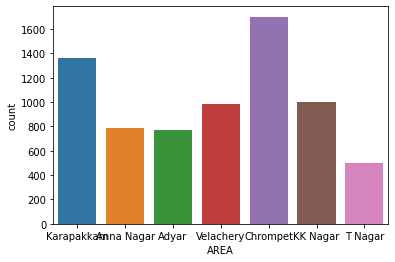

In [21]:
sns.countplot(df['AREA'])
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='BUILDTYPE', ylabel='count'>

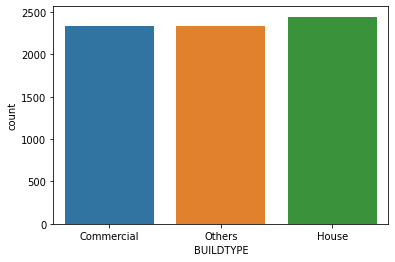

In [22]:
sns.countplot(df['BUILDTYPE'])

<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

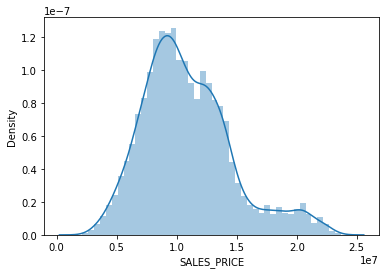

In [23]:
sns.distplot(df['SALES_PRICE'])

#Right skewed Distribution showing some outliers in sale price

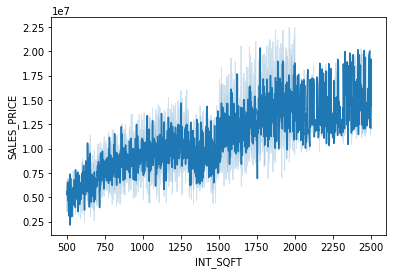

In [24]:
sns.lineplot(x=df["INT_SQFT"], y=df["SALES_PRICE"],data = df)
plt.show()

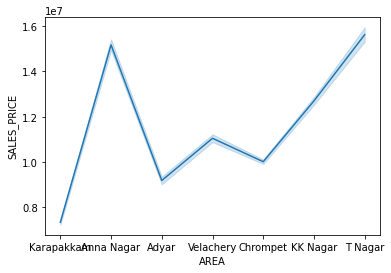

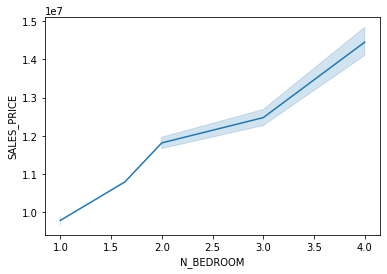

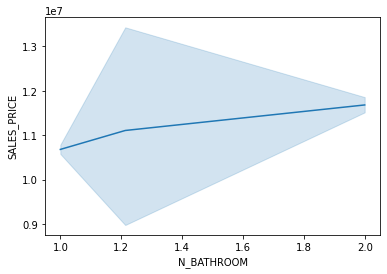

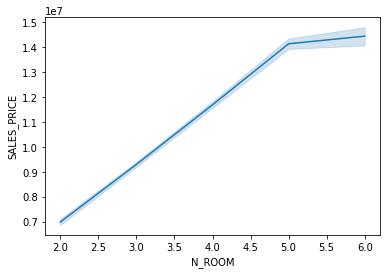

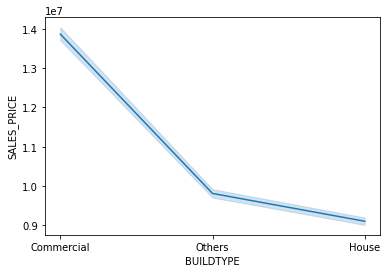

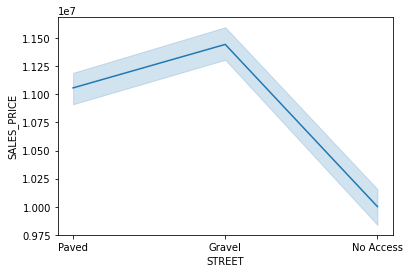

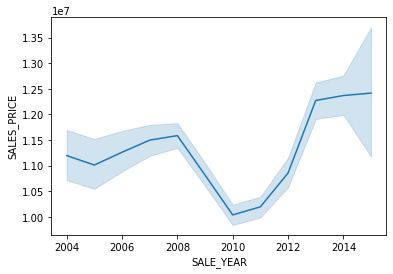

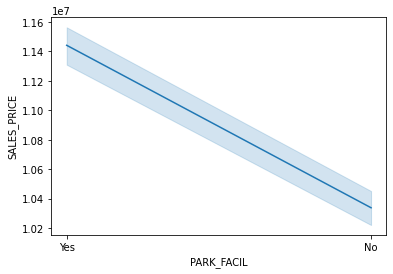

In [25]:
X = ["AREA","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","STREET","SALE_YEAR","PARK_FACIL"]
for i in df[X]:
  sns.lineplot(x= df[i], y= df['SALES_PRICE'],data = df)
  plt.show()

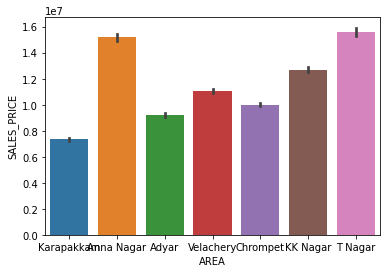

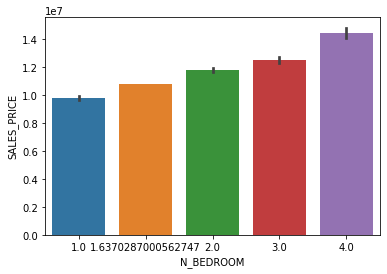

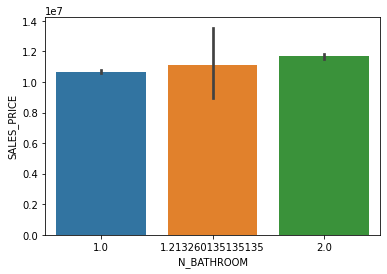

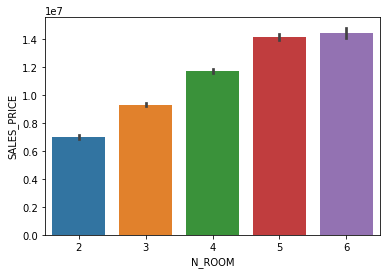

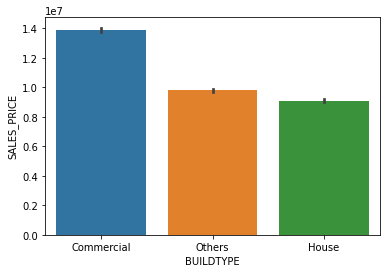

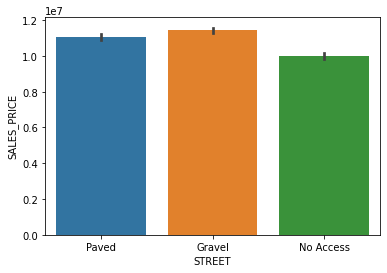

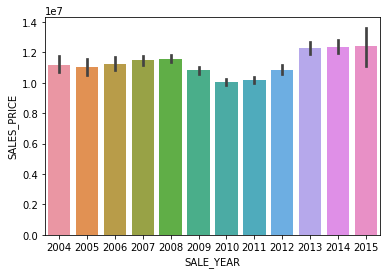

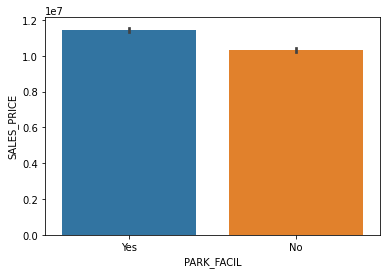

In [26]:
X = ["AREA","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","STREET","SALE_YEAR","PARK_FACIL"]
for i in df[X]:
  sns.barplot(x= df[i], y= df['SALES_PRICE'],data = df)
  plt.show()

In [27]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE,BUILD_YEAR,SALE_YEAR,...,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,PARK_FACIL_Yes,BUILDTYPE_House,BUILDTYPE_Others,STREET_No Access,STREET_Paved
0,1004,131,1.0,1.0,3,380000,144400,7600000,1967,2011,...,0,0,1,0,0,1,0,0,0,1
1,1986,26,2.0,1.0,5,760122,304049,21717770,1995,2006,...,0,0,0,0,0,0,0,0,0,0
2,909,70,1.0,1.0,3,421094,92114,13159200,1992,2012,...,0,0,0,0,0,1,0,0,0,0
3,1855,14,3.0,2.0,5,356321,77042,9630290,1988,2010,...,0,0,0,0,1,0,0,1,0,1
4,1226,84,1.0,1.0,3,237000,74063,7406250,1979,2009,...,0,0,1,0,0,1,0,1,0,0


In [28]:
df.corr().iloc[[7]]

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE,BUILD_YEAR,SALE_YEAR,...,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,PARK_FACIL_Yes,BUILDTYPE_House,BUILDTYPE_Others,STREET_No Access,STREET_Paved
SALES_PRICE,0.612125,0.018783,0.330999,0.108865,0.60276,0.878148,0.626275,1.0,0.116043,0.000906,...,-0.131183,0.193062,-0.460068,0.34502,0.016186,0.146428,-0.344982,-0.201783,-0.149341,0.032493


In [29]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE         1.000000
REG_FEE             0.878148
COMMIS              0.626275
INT_SQFT            0.612125
N_ROOM              0.602760
AREA_Anna Nagar     0.400390
AREA_T Nagar        0.345020
N_BEDROOM           0.330999
AREA_KK Nagar       0.193062
PARK_FACIL_Yes      0.146428
BUILD_YEAR          0.116043
N_BATHROOM          0.108865
STREET_Paved        0.032493
DIST_MAINROAD       0.018783
AREA_Velachery      0.016186
SALE_YEAR           0.000906
SOLD_AGE           -0.118842
AREA_Chrompet      -0.131183
STREET_No Access   -0.149341
BUILDTYPE_Others   -0.201783
BUILDTYPE_House    -0.344982
AREA_Karapakkam    -0.460068
Name: SALES_PRICE, dtype: float64

In [30]:
#From above it is clear that INT_SQFT, N_ROOMS decides the SALES_PRICE

# Model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [32]:
x = df[['INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','REG_FEE','COMMIS','BUILD_YEAR','SALE_YEAR']]

In [33]:
y = df["SALES_PRICE"]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [35]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
reg.predict(x_test)

array([11128814.85677828, 12046345.62658609, 15950612.61854535, ...,
       14893011.72107784, 10347941.03493526,  8426359.47476719])

In [37]:
y_test

3913    13376150
2726    12857440
6220    19124310
2716     4905000
5459    13534450
          ...   
549      7511125
6275     9414770
6772    13614160
2861     8415125
5407     6479750
Name: SALES_PRICE, Length: 2133, dtype: int64

In [38]:
reg.score(x_test,y_test)

0.8250671095134072

# Random Forest Regressor

In [39]:
rfr=RandomForestRegressor().fit(x_train,y_train)
rf_pred = rfr.predict(x_test)
rf_reg_score = rfr.score(x_test,y_test)
rf_reg_score

0.8630984527660238

# XG Boost Regressor

In [40]:
xgbr = XGBRegressor().fit(x_train,y_train)
xgbr_pred = xgbr.predict(x_test)
xgbr_score = xgbr.score(x_test,y_test)
xgbr_score

0.8628504156934628

In [41]:
model = pd.DataFrame({'Model': ['Linear regression','XG Boost Regressor','Random Forest Regressor'],
                     'Score': [reg.score(x_test,y_test),xgbr_score,rf_reg_score]})
model.sort_values(by='Score',ascending=False)

,Model,Score
2,Random Forest Regressor,0.863098
1,XG Boost Regressor,0.862850
0,Linear regression,0.825067
